**University of Science and Technology UST,  Zewail City**<br>
**CIE Program**<br>
**Computer Vision - CIE 552**<br>
**Lab Assignment #3 - Image Enhancment**<br>

**Student Name:** Elsayed Mohammed Elsayed Mostafa <br>
**Student ID:**   201700316

## Imports

In [ ]:
import numpy as np
from scipy.signal import convolve2d, correlate2d
from matplotlib import pyplot as plt
import skimage
from skimage import io; io.use_plugin('matplotlib')
from skimage.util import random_noise
from skimage import exposure
from typing import List
plt.rcParams["figure.figsize"] = (9,9) #Defualt option for plt.imshow()

## Utility functions

In [ ]:
def plot_figure(image_list: List[np.ndarray], title_list: List[str], height: int, width: int, cmap: str='gray'):
    '''''
    A functions that visulaize the passed image list using matplotlib with a name for each figure
    @Inputs 
        image_list: A list of ndarray images
        title_list: A list of titles for each image passed in image_list with the same arrangment
        height :    The number of rows created in the subplot
        width  :    The number of columns created in the subplot
        cmap   :    The color mapping used in matplotlib
    @Author: Eng. Mohammed Elsayed (email: asmohamed@zewailcity.edu.eg)
    '''''
    assert len(image_list) == len(title_list)
    assert height > 0
    assert width > 0
    for i in range(len(image_list)):
        
        if cmap == 'gray':
            plt.subplot(height, width, i + 1), plt.imshow(image_list[i], cmap=cmap);
        elif cmap == 'rgb':
            plt.subplot(height, width, i + 1), plt.imshow(image_list[i]);
        elif cmap == 'bgr':
            plt.subplot(height, width, i + 1), plt.imshow(cv2.cvtColor(image_list[i], cv2.COLOR_BGR2RGB));
        else:
            plt.subplot(height, width, i + 1), plt.imshow(image_list[i], cmap=cmap);
            
        plt.title(title_list[i])
        plt.xticks([]), plt.yticks([])
    plt.show()

## Adding Gaussian Noise

In [ ]:
#Reading the image using skimage
img_name = 'mona_lisa.jpg'
img = skimage.io.imread(fname=img_name, as_gray=True)

# The next line convert the image array into float as random_noise() function uses the image array as float.
# But it can be ignored as the function itself converts the image into floats itself.
#img = skimage.img_as_float(img)

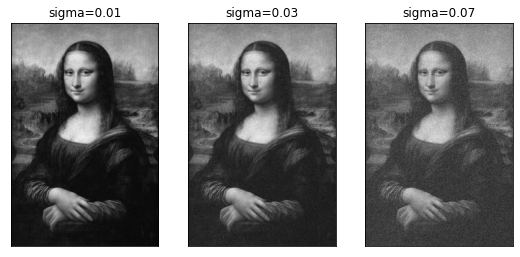

In [ ]:
n1 = random_noise(img, mode='gaussian', clip=False, var=0.01**2)
n2 = random_noise(img, mode='gaussian', clip=False, var=0.03**2)
n3 = random_noise(img, mode='gaussian', clip=False, var=0.07**2)
plot_figure([n1,n2,n3 ], ['sigma=0.01', 'sigma=0.03', 'sigma=0.07'], 1, 3, 'gray')

* **What do you expect if you subtracted n2 and n1?**
> The difference would be a noise image with different variance, however the mean would still be zero such as n1 and n2

* **What is the mean and variance of the error?**
> The error is the noise added. In the 3 images, the mean is 0. However, the variances in n1,n2 and n3 are 0.0001, 0.0009, 0.0049 respectively

* **How do you think we can remove it?**
> Using a gaussian filter or mean filter. However, using a mean filter will stronlgy blur the image, hence it's way better to use a gaussian filter

* **What will happen if we averaged noisy images with each others? Average the same image at multiple random noise levels (gaussian sigmas)**
> This will create another noisy image with different varaince. It will be lower than 0.07 and higher than 0.01

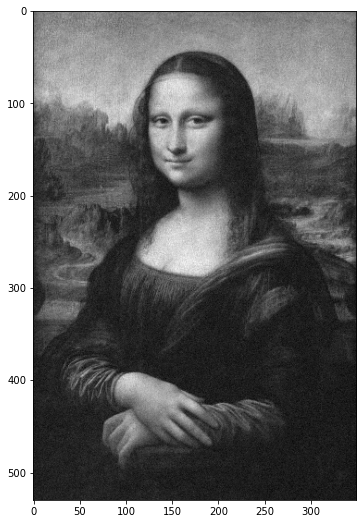

In [ ]:
#Averaging the 3 noisy images.
nn = (n1+n2+n3) / 3
plt.imshow(nn, cmap='gray');

## Negative Transformation

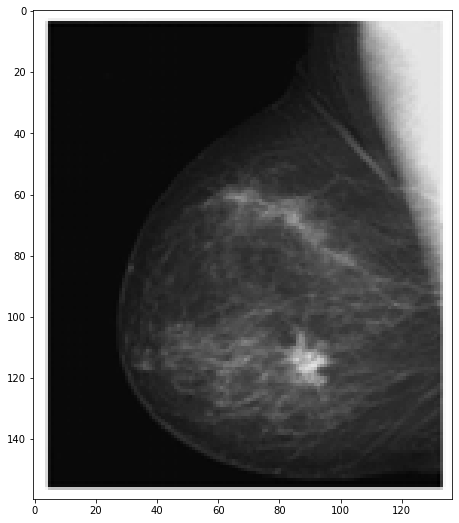

In [ ]:
#Reading and visulaizing the image
negative_img = 'negative.png'
img = skimage.io.imread(fname=negative_img, as_gray=True)
plt.imshow(img, cmap='gray');

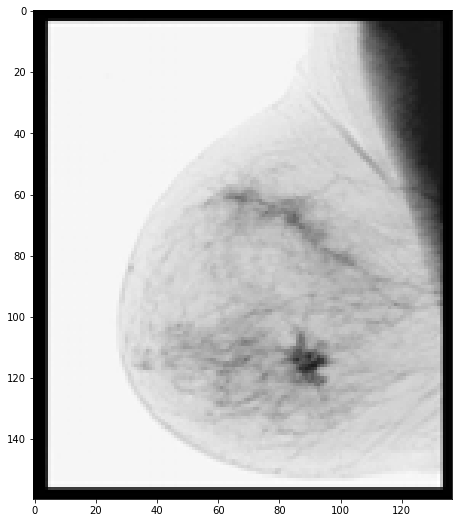

In [ ]:
# Applying the negative transformation
max_intensity = np.max(img)
ts_img = max_intensity - img
plt.imshow(ts_img, cmap='gray');

## Contrast Stretching

The range of contrast is  [0.29800862, 0.99999994]


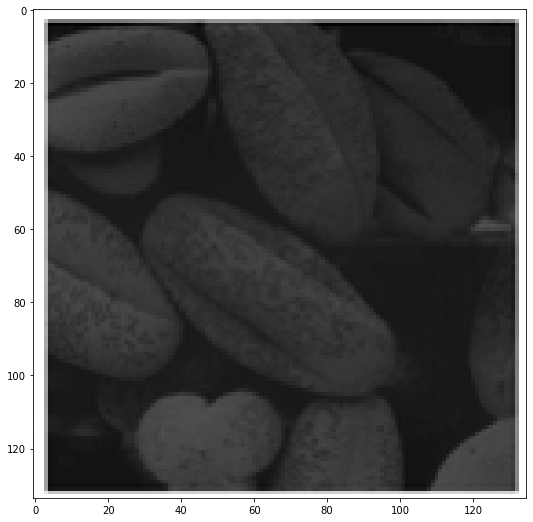

In [ ]:
#Reading and visulaizing the image
dark_img = 'dark.png'
img = skimage.io.imread(fname=dark_img, as_gray=True)
img_min, img_max = (np.min(img), np.max(img))
print('The range of contrast is ',[img_min, img_max])
plt.imshow(img, cmap='gray');

The range of contrast is  [0.0, 1.0]


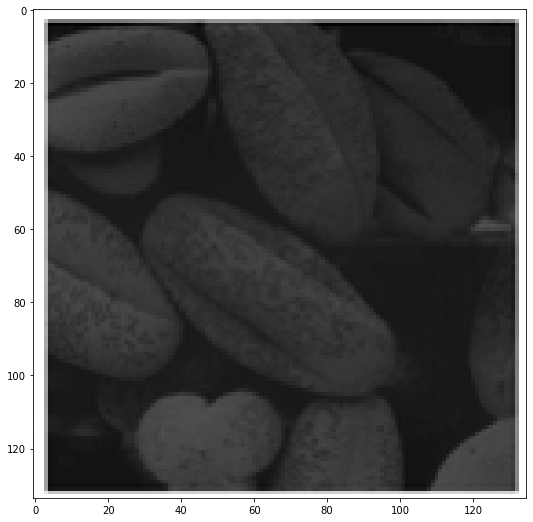

In [ ]:
stretched_img = (img - img_min) / (img_max - img_min)
print('The range of contrast is ',[np.min(stretched_img),np.max(stretched_img)])
plt.imshow(stretched_img, cmap='gray');

**The difference between the original and the stretched images is not very observable, as the range of the original image is relatively high. However, the stretched image has lighter areas at the black spots which indicates stretching**

## Gamma Correction

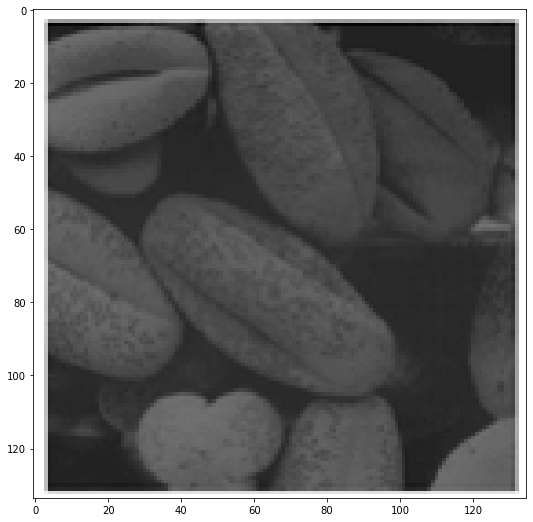

In [ ]:
gamma = 0.05
c = 1
c_img = c*img**gamma
plt.imshow(c_img, cmap='gray');

**The ihancment appears here better, the image is overall lighter than the original one. This occurred because I chose the value of $\gamma$ to be 0.05. For $\gamma$ > 1, the image will be darker than the original one**

## Histogram equalization

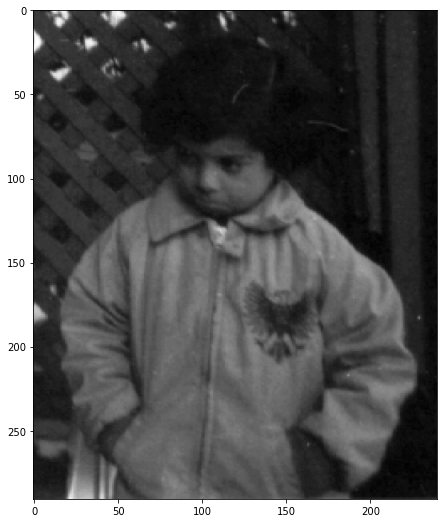

In [ ]:
#Reading and visulaizing the image
badkid_img = 'bad_kid.tif'
img = skimage.io.imread(fname=badkid_img, as_gray=True)
plt.imshow(img, cmap='gray');

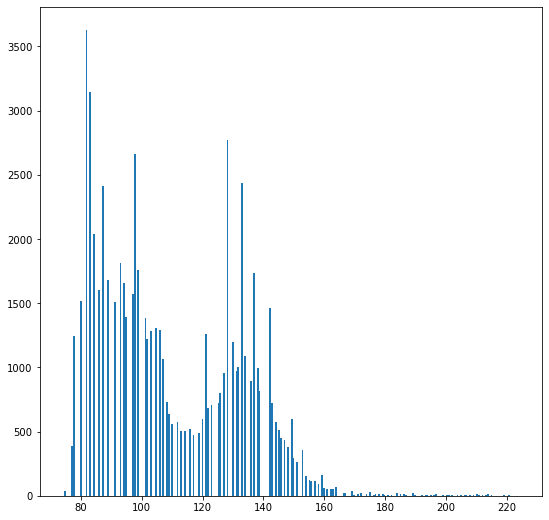

In [ ]:
# Show the histogram of the image intensities
plt.hist(img.ravel(),bins=256)
plt.show()

The objective of the equalization is to redistribute the intisties on the whole range instead of being congested in small range.

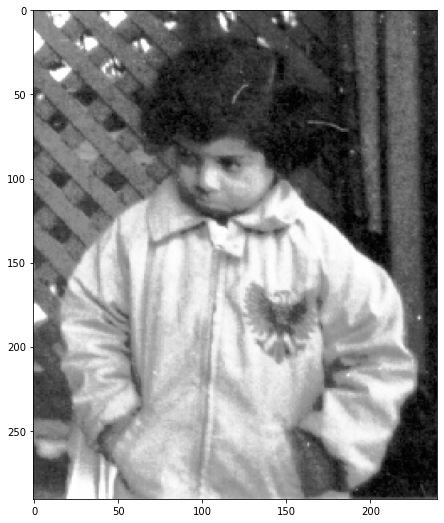

In [ ]:
# Appling the histogram equalization
new_img= exposure.equalize_hist(img)
plt.imshow(new_img, cmap='gray');

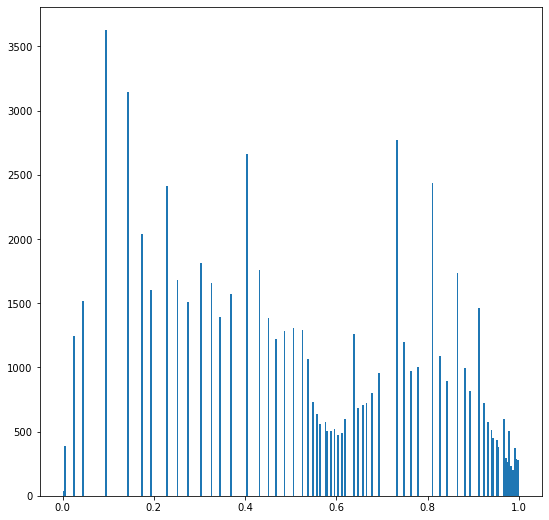

In [ ]:
# Show the histogram of the image intensities after equalization
plt.hist(new_img.ravel(),bins=256)
plt.show()

Now, the image is equalized and the intinisties are more distributed. Hence, the image would be brighter.

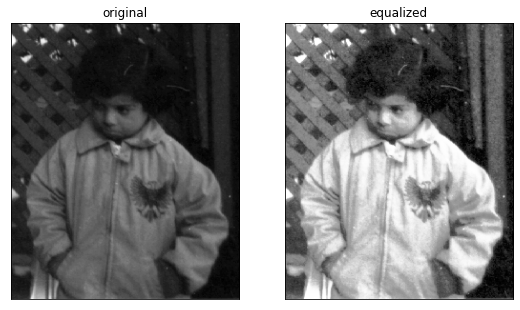

In [ ]:
# Comparing the image before and after histogram equalization
plot_figure([img, new_img], ['original', 'equalized'],1, 2, 'gray')